In [37]:
import torch
from torch.optim import lr_scheduler

In [38]:
total_frames = 5242880 * 1
num_robots = 128
time_steps_per_batch = 32
epochs = total_frames // (num_robots * time_steps_per_batch)

In [39]:
def test_sched(scheduler, scheduler_opts, init_lr=0.1):
    optim = torch.optim.Adam([torch.zeros(1)], lr=init_lr)
    scheduler = scheduler(optim, **scheduler_opts)
    lrs = []
    for epoch in range(epochs):
        optim.step()
        scheduler.step()
        lrs.append(optim.param_groups[0]['lr'])
        
    lrs = torch.tensor(lrs)
    return lrs

In [40]:
sched = lr_scheduler.ExponentialLR
gamma = 0.997
init_lr = 2e-4
sched_opts = {'gamma': gamma}
exp_lrs = test_sched(sched, sched_opts, init_lr=init_lr)

Final LR: 4.27e-06


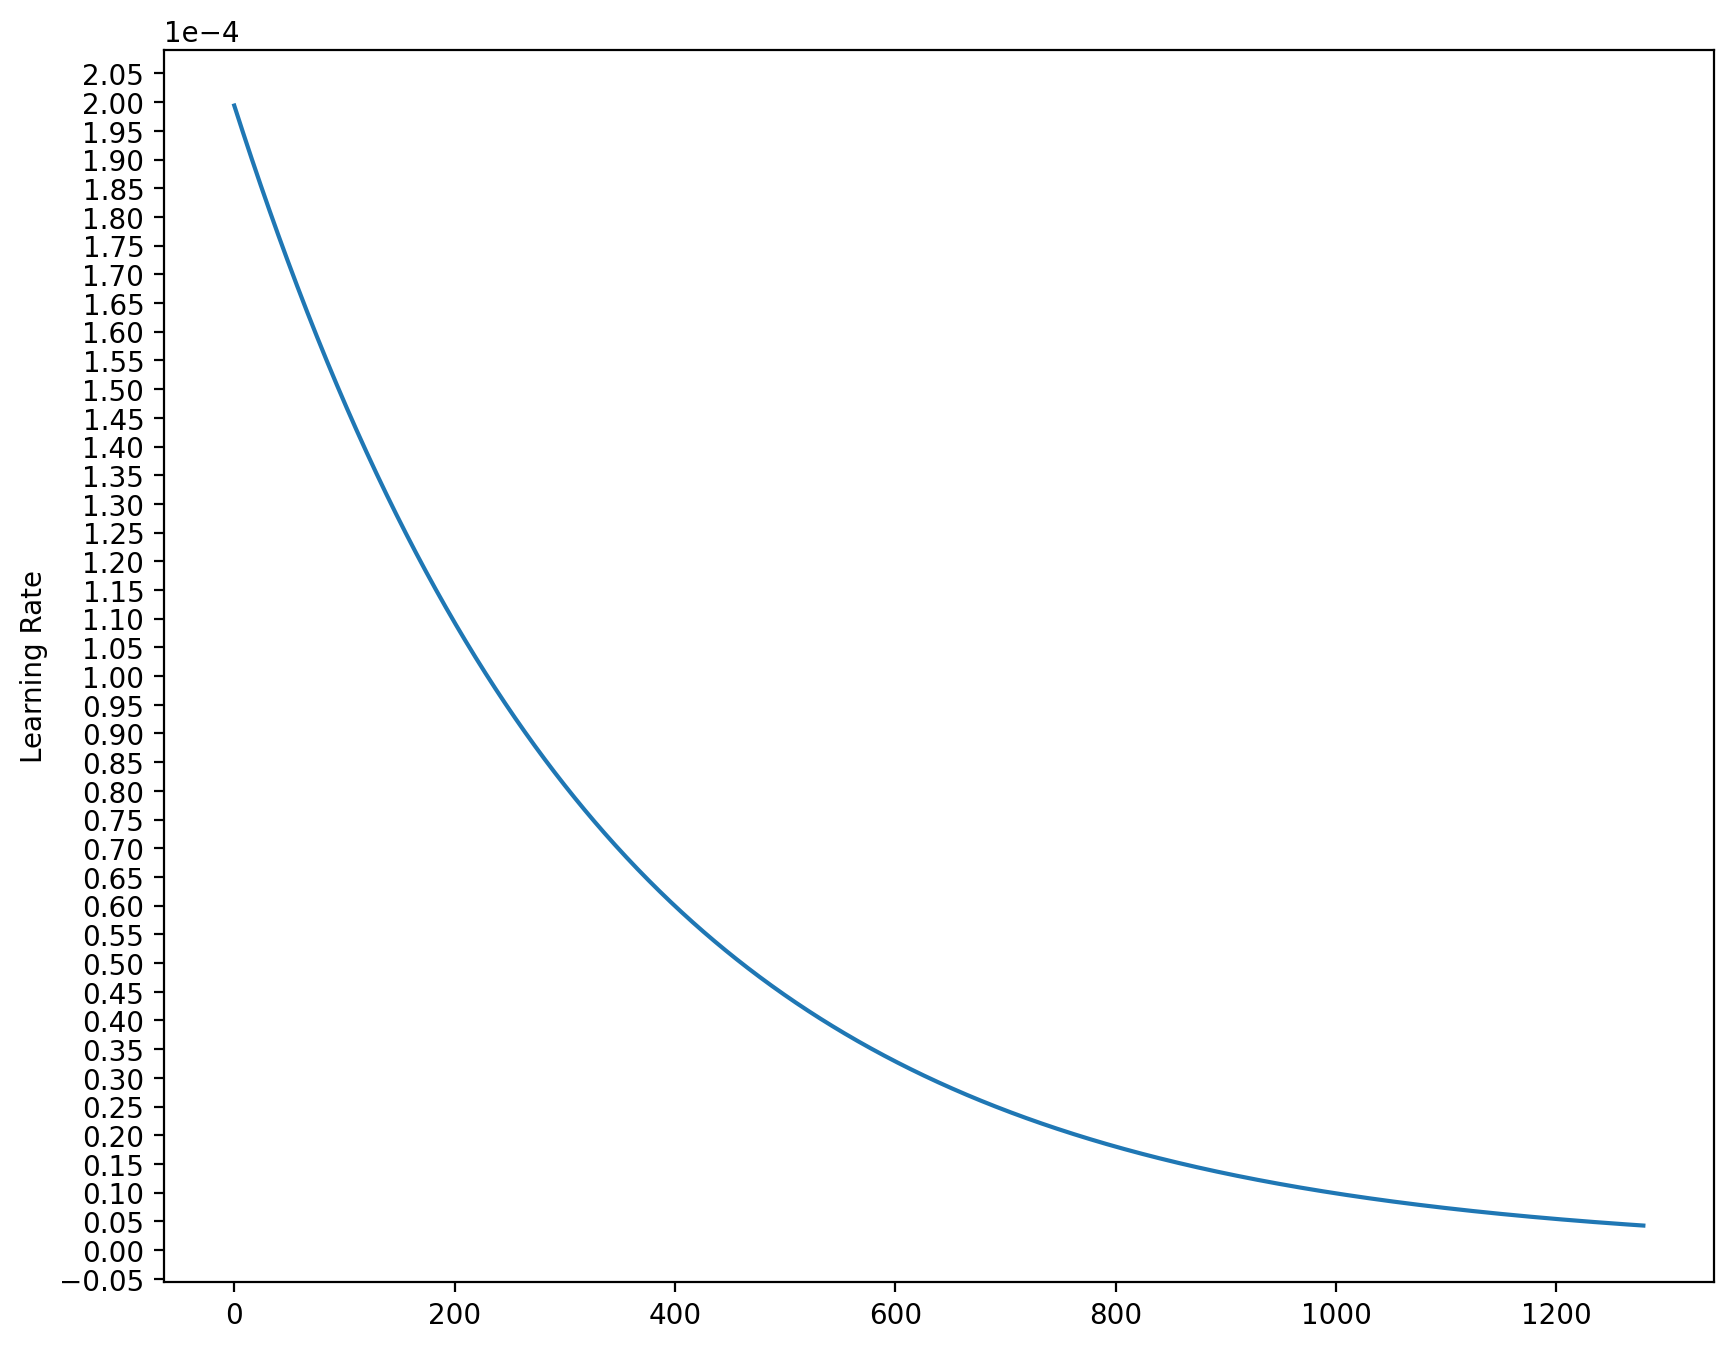

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8), dpi=200)
plt.ylabel('Learning Rate')
plt.locator_params(axis='y', nbins=50)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(exp_lrs.numpy())
print(f"Final LR: {exp_lrs[-1].item():.2e}")